딥러닝 모델 개발에 유용한 파이썬 패키지에 대해서 다뤄봅니다.

### Pickle

In [2]:
users = {'id1':'kim', 'id2':'lee', 'id3':'choi'}
f = open('users.txt', 'w')

import pickle
pickle.dump(users, f)
f.close()

In [3]:
f = open('users.txt')
new_users = pickle.load(f)
print(new_users)

{'id2': 'lee', 'id3': 'choi', 'id1': 'kim'}


### glob

In [4]:
import glob
glob.glob('*.*')

['2017-1-27-CNN_Layer_Talk.ipynb',
 '2017-1-27-Keras_Talk.ipynb',
 '2017-1-27-LossFuncion_Talk.ipynb',
 '2017-1-27-MLP_Layer_Talk.ipynb',
 '2017-1-27-Optimizer_Talk.ipynb',
 '2017-2-22-Integrating_Keras_and_TensorFlow.ipynb',
 '2017-2-4-AutoEncoder_Getting_Started.ipynb',
 '2017-2-4-BinaryClassification_Example.ipynb',
 '2017-2-4-ImageClassification_Example.ipynb',
 '2017-2-4-MLP_Getting_Started-Copy1.ipynb',
 '2017-2-4-MLP_Getting_Started.ipynb',
 '2017-2-4-MulticlassClassification_Example.ipynb',
 '2017-2-4-ObjectRecognition_Example.ipynb',
 '2017-2-4-Regression_Example.ipynb',
 '2017-2-4-RNN_Getting_Started.ipynb',
 '2017-2-4-TimeSeriesPrediction_Example.ipynb',
 '2017-2-6-First_Keras_Offline_Meeting.ipynb',
 '2017-3-11-To_Use_TensorBoard.ipynb',
 '2017-3-15-Keras_Offline_Install.ipynb',
 '2017-3-25-Dataset_and_Fit_Talk.ipynb',
 '2017-3-8-CNN_Data_Augmentation.ipynb',
 '2017-3-8-CNN_Getting_Started.ipynb',
 '2017-4-9-RNN_Getting_Started_2.ipynb',
 '2017-4-9-RNN_Layer_Talk.ipynb',
 '

In [7]:
glob.glob('*.txt')

['text.txt', 'tykimos2.txt', 'users.txt']

In [9]:
import os.path
files = glob.glob('*')
for x in files:
    if os.path.isdir(x):
        print(x)

abstract
graph
warehouse


## Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [181]:
import numpy as np

### Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [196]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print type(a), a.shape, a[0], a[1], a[2]
a[0] = 5                 # Change an element of the array
print a                  

<type 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [198]:
b = np.array([[1,2,3],[4,5,6]])   # Create a rank 2 array
print b

[[1 2 3]
 [4 5 6]]


In [199]:
print b.shape                   
print b[0, 0], b[0, 1], b[1, 0]

(2, 3)
1 2 4


Numpy also provides many functions to create arrays:

In [186]:
a = np.zeros((2,2))  # Create an array of all zeros
print a

[[ 0.  0.]
 [ 0.  0.]]


In [187]:
b = np.ones((1,2))   # Create an array of all ones
print b

[[ 1.  1.]]


In [188]:
c = np.full((2,2), 7) # Create a constant array
print c 

[[ 7.  7.]
 [ 7.  7.]]


In [190]:
d = np.eye(2)        # Create a 2x2 identity matrix
print d

[[ 1.  0.]
 [ 0.  1.]]


In [192]:
e = np.random.random((2,2)) # Create an array filled with random values
print e

[[ 0.09477679  0.79267634]
 [ 0.78291274  0.38962829]]


### Array indexing (지루함)

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [203]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print b

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [202]:
print a[0, 1]  
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print a[0, 1] 

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [11]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print a

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [14]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a  
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
row_r3 = a[[1], :]  # Rank 2 view of the second row of a
print row_r1, row_r1.shape 
print row_r2, row_r2.shape
print row_r3, row_r3.shape

[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[[5 6 7 8]] (1, 4)


In [15]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print col_r1, col_r1.shape
print
print col_r2, col_r2.shape

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [16]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print a[[0, 1, 2], [0, 1, 0]]

# The above example of integer array indexing is equivalent to this:
print np.array([a[0, 0], a[1, 1], a[2, 0]])

[1 4 5]
[1 4 5]


In [221]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print a[[0, 0], [1, 1]]

# Equivalent to the previous integer array indexing example
print np.array([a[0, 1], a[0, 1]])

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [18]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print a

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [19]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

print(np.arange(4))

# Select one element from each row of a using the indices in b
print a[np.arange(4), b]  # Prints "[ 1  6  7 11]"

[0 1 2 3]
[ 1  6  7 11]


In [218]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print a

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [223]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print bool_idx

[[False False]
 [ True  True]
 [ True  True]]


In [225]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print a[bool_idx]

# We can do all of the above in a single concise statement:
print a[a > 2]

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

### Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [226]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print x.dtype, y.dtype, z.dtype

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [227]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print x + y
print np.add(x, y)

[[  6.   8.]
 [ 10.  12.]]
[[  6.   8.]
 [ 10.  12.]]


In [228]:
# Elementwise difference; both produce the array
print x - y
print np.subtract(x, y)

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [229]:
# Elementwise product; both produce the array
print x * y
print np.multiply(x, y)

[[  5.  12.]
 [ 21.  32.]]
[[  5.  12.]
 [ 21.  32.]]


In [230]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print x / y
print np.divide(x, y)

[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]
[[ 0.2         0.33333333]
 [ 0.42857143  0.5       ]]


In [231]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print np.sqrt(x)

[[ 1.          1.41421356]
 [ 1.73205081  2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [232]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print v.dot(w)
print np.dot(v, w)

219
219


In [233]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print x.dot(v)
print np.dot(x, v)

[29 67]
[29 67]


In [234]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print x.dot(y)
print np.dot(x, y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [235]:
x = np.array([[1,2],[3,4]])

print np.sum(x)  # Compute sum of all elements; prints "10"
print np.sum(x, axis=0)  # Compute sum of each column; prints "[4 6]"
print np.sum(x, axis=1)  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [236]:
print x
print x.T

[[1 2]
 [3 4]]
[[1 3]
 [2 4]]


In [20]:
v = np.array([[1,2,3]])
print v 
print v.T

[[1 2 3]]
[[1]
 [2]
 [3]]


### Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [23]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print y

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [24]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print vv                 # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [25]:
y = x + vv  # Add x and vv elementwise
print y

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [26]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print y

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [27]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print np.reshape(v, (3, 1)) * w

[[ 4  5]
 [ 8 10]
 [12 15]]


In [28]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print x + v

[[2 4 6]
 [5 7 9]]


In [29]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print (x.T + w).T

[[ 5  6  7]
 [ 9 10 11]]


In [30]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print x + np.reshape(w, (2, 1))

[[ 5  6  7]
 [ 9 10 11]]


In [31]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print x * 2

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

## Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [33]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [34]:
%matplotlib inline

### Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

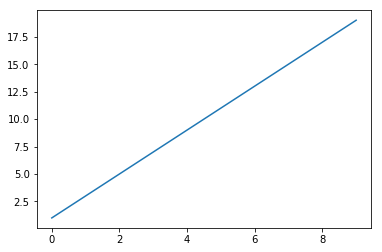

In [35]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 10, 1)
y = 2 * x + 1

# Plot the points using matplotlib
plt.plot(x, y)

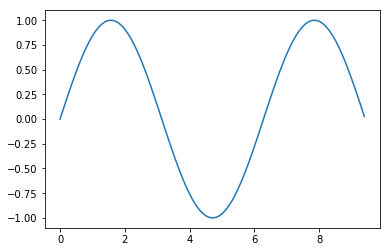

In [36]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

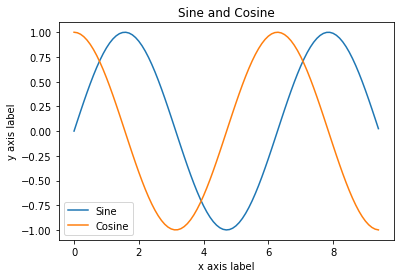

In [38]:
y_cos = np.cos(x)
y_sin = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

### Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

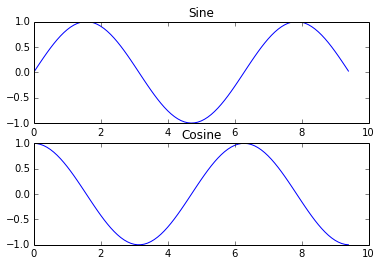

In [255]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

### pandas

In [39]:
from pandas import Series, DataFrame

In [40]:
import pandas
print(pandas.Series)

<class 'pandas.core.series.Series'>


In [41]:
from pandas import Series, DataFrame

kakao = Series([92600, 92400, 92100, 94300, 92300])
print(kakao)

0    92600
1    92400
2    92100
3    94300
4    92300
dtype: int64


In [42]:
print(kakao[0])
print(kakao[2])
print(kakao[4])

92600
92100
92300


In [43]:
kakao2 = Series([92600, 92400, 92100, 94300, 92300], index=['2016-02-19',
                                                            '2016-02-18',
                                                            '2016-02-17',
                                                            '2016-02-16',
                                                            '2016-02-15'])
print(kakao2)

2016-02-19    92600
2016-02-18    92400
2016-02-17    92100
2016-02-16    94300
2016-02-15    92300
dtype: int64


In [44]:
print(kakao2['2016-02-19'])
print(kakao2['2016-02-18'])

92600
92400


In [45]:
for date in kakao2.index:
    print(date)

for ending_price in kakao2.values:
    print(ending_price)

2016-02-19
2016-02-18
2016-02-17
2016-02-16
2016-02-15
92600
92400
92100
94300
92300


In [46]:
from pandas import Series, DataFrame

mine   = Series([10, 20, 30], index=['naver', 'sk', 'kt'])
friend = Series([10, 30, 20], index=['kt', 'naver', 'sk'])

In [48]:
merge = mine + friend
print(merge)

kt       40
naver    40
sk       40
dtype: int64


In [49]:
from pandas import Series, DataFrame

mine   = Series([10, 20, 30], index=['naver1', 'sk', 'kt'])
friend = Series([10, 30, 20], index=['kt', 'naver2', 'sk'])

merge = mine + friend
print(merge)

kt        40.0
naver1     NaN
naver2     NaN
sk        40.0
dtype: float64


In [51]:
from pandas import Series, DataFrame

raw_data = {'col0': [1, 2, 3, 4],
            'col1': [10, 20, 30, 40],
            'col2': [100, 200, 300, 400]}

print(raw_data)
data = DataFrame(raw_data)
print(data)

{'col2': [100, 200, 300, 400], 'col0': [1, 2, 3, 4], 'col1': [10, 20, 30, 40]}
   col0  col1  col2
0     1    10   100
1     2    20   200
2     3    30   300
3     4    40   400


In [52]:
data['col0']

0    1
1    2
2    3
3    4
Name: col0, dtype: int64

In [53]:
from pandas import Series, DataFrame

daeshin = {'open':  [11650, 11100, 11200, 11100, 11000],
           'high':  [12100, 11800, 11200, 11100, 11150],
           'low' :  [11600, 11050, 10900, 10950, 10900],
           'close': [11900, 11600, 11000, 11100, 11050]}

daeshin_day = DataFrame(daeshin)
print(daeshin_day)

   close   high    low   open
0  11900  12100  11600  11650
1  11600  11800  11050  11100
2  11000  11200  10900  11200
3  11100  11100  10950  11100
4  11050  11150  10900  11000


In [55]:
daeshin_day = DataFrame(daeshin, columns=['open', 'high', 'low', 'close'])
print(daeshin_day)

    open   high    low  close
0  11650  12100  11600  11900
1  11100  11800  11050  11600
2  11200  11200  10900  11000
3  11100  11100  10950  11100
4  11000  11150  10900  11050


In [57]:
date = ['16.02.29', '16.02.26', '16.02.25', '16.02.24', '16.02.23']
daeshin_day = DataFrame(daeshin, columns=['open', 'high', 'low', 'close'], index=date)
print(daeshin_day)

           open   high    low  close
16.02.29  11650  12100  11600  11900
16.02.26  11100  11800  11050  11600
16.02.25  11200  11200  10900  11000
16.02.24  11100  11100  10950  11100
16.02.23  11000  11150  10900  11050


In [60]:
close = daeshin_day['close']
print(close)

16.02.29    11900
16.02.26    11600
16.02.25    11000
16.02.24    11100
16.02.23    11050
Name: close, dtype: int64


In [62]:
print(daeshin_day['16.02.24'])

11100


In [64]:
day_data = daeshin_day.loc['16.02.24']
print(day_data)
print(type(day_data))

open     11100
high     11100
low      10950
close    11100
Name: 16.02.24, dtype: int64
<class 'pandas.core.series.Series'>


In [65]:
print(daeshin_day.columns)
print(daeshin_day.index)


Index([u'open', u'high', u'low', u'close'], dtype='object')
Index([u'16.02.29', u'16.02.26', u'16.02.25', u'16.02.24', u'16.02.23'], dtype='object')
